In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

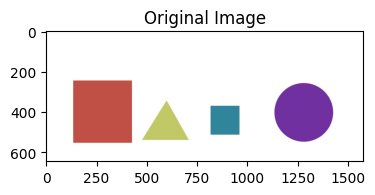

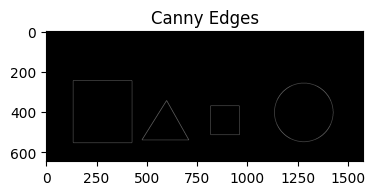

Number of contours found =  4


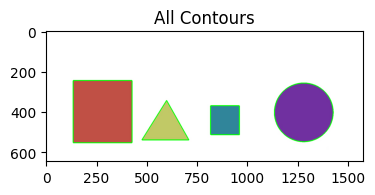

In [2]:
image = cv2.imread('images/bunchofshapes.jpg')
imshow('Original Image', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#find Canny edges
edged = cv2.Canny(gray, 50, 200)
imshow('Canny Edges', edged)

#Find contours 
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found = ", len(contours))

#Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 3)
imshow('All Contours', image)

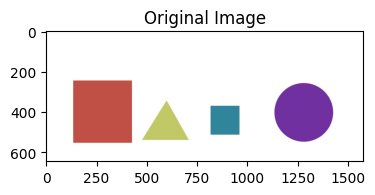

Contour Areas before sorting....
[20587.5, 22901.5, 66579.5, 90222.0]
Contour Areas after sorting....
[90222.0, 66579.5, 22901.5, 20587.5]


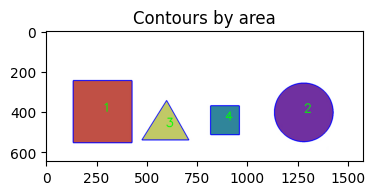

In [3]:
def get_contour_area(contours):
    """return the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

image = cv2.imread('images/bunchofshapes.jpg')
imshow('Original Image', image)

print("Contour Areas before sorting....")
print(get_contour_area(contours))

#sort contours large to small area

#Contour area is given by the function 
#cv2.contourArea() or from moments, M[‘m00’].
sorted_contours = sorted(contours, key=cv2.contourArea, reverse = True)

print("Contour Areas after sorting....")
print(get_contour_area(sorted_contours))

#Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
    cv2.drawContours(image, [c], -1, (255, 0, 0), 3)

imshow('Contours by area', image)